# Session 3 - Pixel Classifier
*Goal: Learn how to use a machine-learning pixel classifier to segment Regions of Interest*

#### 1. Preparation
1. First, export an image of your manual annotations using the method discussed in [Session1](./Session%201-%20Visualization.ipynb#5.-Exporting-Region-Images) (`File > Export images > Rendered RGB (with overlays)`)
2. Delete the Tumor annotation, leave the tissue Region* annotation alone.

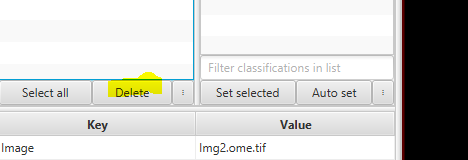

3. Make sure the tissue annotation is locked (it should be already). 

<img src="Images\LockedAnnotation.PNG">

If you don't see the lock symbol, right click the annotation in the Annotation list and click `Lock`. <br>
4. Turn on all channels except the blank channels. 

### 2. Train a Classifier
1. Within the class list, select 'Tumor' and then click "Auto set"
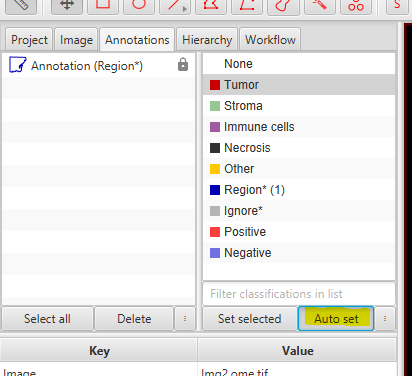

2. Use the `Polyline` tool to draw some squiggles over the cancer region. <img src="https://qupath.readthedocs.io/en/0.5/_images/POLYLINE_TOOL.png" width="50"><br>
These will be automatically assigned the "Tumor" class<br>
Get near the edges without going over into the tissue stroma<br>
3. Within the class list, click on 'Ignore*'
4. Draw some lines over the non-cancer (S100 negative) region using the Polyline tool. Also draw 1 small line in the non-tissue background region
5. Open up the classifier training window: `Classify > Pixel classification > Train pixel classifier`
6. Click on `Live Prediction`
7. You'll see results that look something like this:


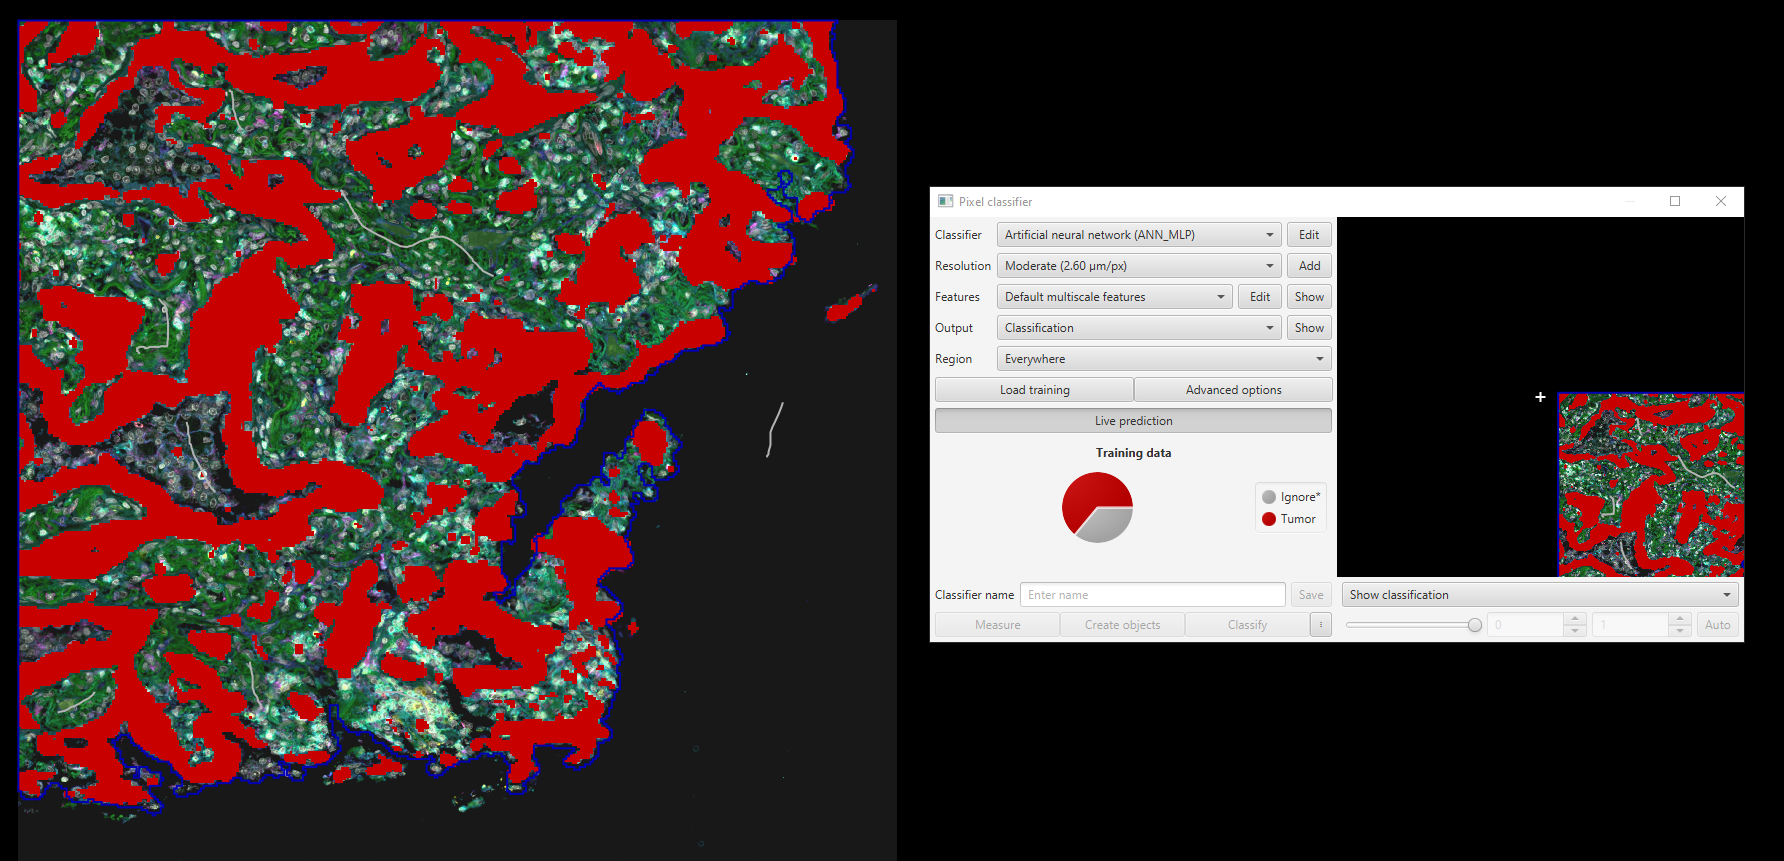

If you can't see anything, make sure the C button is selected and that the transparency slider is all the way to the right
 <img src="Images\ClassificationOn.PNG">


7. **Iterate!** Add new annotations to correct errors until the results looks better. You'll find that some small issues won't go away with additional training.

8. **Adjust Classifier Features and Settings** Choosing the best features and settings for a classifier is both essential and complex. We'll begin talking about it now, and we'll keep coming back to it throughout the course. 

    1. Increase the resolution (lower numbers) to smooth the results, decrease the resolution (higher numbers) to make it process faster
    2. To change the features that the ML algorithm uses for its math, click "Edit" next to "Default Multiscale Features"





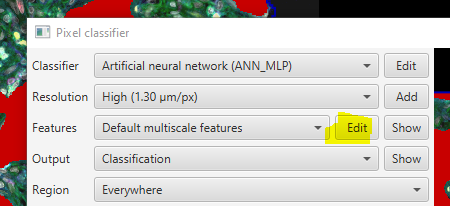

Recommended settings for this example:
  - Resolution: High (1.30 um/pixel)
  - Channels: Hoechst, AF1, PDL1, CD45, S100a
  - Scales: 1.0, 2.0, 4.0
  - Features:  Gaussian, Laplacian of Gaussian
  
9. Iterate until you are happy. 

10. In the classifier training window, name your classifier 'TumorPixelClassifier' and click <kbd>Save</kbd>

10. In the main window - `File > Save` to save your image and training annotations. *DO IT NOW.*

### 3. Include multiple images in training
A classifier trained on a single image *cannot be extrapolated* to other images. You must always train on a representative sample of the data in your project. 

1. Double check that you have saved your current image.
2. Within the Project tab, double click on LungImg1.ome.tiff to open it.

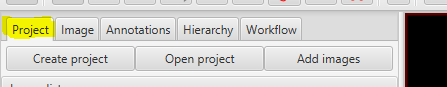

  The classifier probably does not look good!  

3. Load the LungImg2 training data. Within the classifier trianing window, go to: <kbd>Load training</kbd>, select LungImg2.ome.tiff, then click <kbd> \> </kbd> and <kbd> Apply </kbd>

<img src="Images\LoadTraining.PNG" width="600">

4. Add new training annotations to improve the classifier. Also, try adjusting the features, sizes, and channels to see how these paramters affect the results. 

5. When it looks (acceptably) good, repeat steps 2-4 above with LungImg3. 

6. At the end, revisit LungImg2 to make sure these changes didn't ruin anything. 

7. Save the classifier. It will ask you if you want to overwrite the existing file- click Yes.  


### 4. Creating Objects using the classifier

The classifier itself is just a way to determine if a pixel belongs to the tumor or not, depending on intensity and context. Creating the object that outlines the tumor (segmentation) is a separate step. 

1. Before creating the object, we are going to save a copy of our training annotations. First, save your current image! Then, go to your project folder by right clicking on the name of any image in the Project tab and selecting `Open directory > Project...` 

  <img src="Images\ProjectDir.PNG">
2. Go up one more folder to copy-paste the entire QuPath project folder to create a duplicate. Name it something like 'Tumor Classifier Training'

3. Make sure you have LungImg2 open. To delete all of the training annotations, hold <kbd>Ctrl</kbd> and click on the classes 'Tumor' and 'Ignore*'. Then, `right click > Select objects by classification`. Then,  <kbd>Delete</kbd>

  <img src="Images\SelectByClass.gif">


4. Load the pixel classifier: `Classify > Pixel classification > Load Pixel Classifier`. In the dropdown, choose the Tumor clasisfier you just made. 

5. Select the Tissue annotation by using the same process as Step 3. Select the 'Region*' class, `right click > Select objects by classification`. With it selected, in the Load pixel classifier window, click `Create Objects` and when it asks about Parent Objects, choose `Current Selection`

  <img src="Images\CreateObjectsPC.PNG">

6. This will bring up the Create objects window, similar to when we [created the tissue annotation.](./Session%202-%20Tissue%20Annotations.ipynb#1.-Create-a-Tissue-Annotation-to-define-the-tissue-area) Use these settings:
  - New object type: Annotation
  - Minimum object size: 500
  - Minimum hole size: 500
  
  
  

